In [38]:
# Define the configurations
configurations = {
    "Energy | Uniform K1": {
        "clusters": ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"],
        "avg_energy": [0.000018, 0.000011, 0.000016, 0.000013, 0.000020],
        "avg_seconds_per_sample": [0.000150, 0.000138, 0.000148, 0.000132, 0.000156],
        "local_iterations": [5, 5, 5, 5, 5],
        "number_of_clients": [11, 14, 10, 9, 6]
    },
    "Energy | High K1 for Low Energy": {
        "clusters": ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
        "avg_energy": [0.000018, 0.000011, 0.000016, 0.000013, 0.000020],
        "avg_seconds_per_sample": [0.000150, 0.000138, 0.000148, 0.000132, 0.000156],
        "local_iterations": [4, 7, 5, 6, 3],
        "number_of_clients": [11, 14, 10, 9, 6]
    },
    "Energy | High K1 for High Energy": {
        "clusters": ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
        "avg_energy": [0.000018, 0.000011, 0.000016, 0.000013, 0.000020],
        "avg_seconds_per_sample": [0.000150, 0.000138, 0.000148, 0.000132, 0.000156],
        "local_iterations": [6, 3, 5, 4, 7],
        "number_of_clients": [11, 14, 10, 9, 6]
    },
    "Energy, TrainingTime | Uniform K1": {
        "clusters": ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"],
        "avg_energy": [0.000018, 0.000013, 0.000012, 0.000018, 0.000017],
        "avg_seconds_per_sample": [0.000166, 0.000173, 0.000122, 0.000137, 0.000104],
        "local_iterations": [5, 5, 5, 5, 5],
        "number_of_clients": [15, 8, 15, 7, 5]
    },
    "Energy, TrainingTime | High K1 for Low Energy": {
        "clusters": ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
        "avg_energy": [0.000018, 0.000013, 0.000012, 0.000018, 0.000017],
        "avg_seconds_per_sample": [0.000166, 0.000173, 0.000122, 0.000137, 0.000104],
        "local_iterations": [3, 6, 7, 4, 5],
        "number_of_clients": [15, 8, 15, 7, 5]
    },
    "Energy, TrainingTime | High K1 for High Energy": {
        "clusters": ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
        "avg_energy": [0.000018, 0.000013, 0.000012, 0.000018, 0.000017],
        "avg_seconds_per_sample": [0.000166, 0.000173, 0.000122, 0.000137, 0.000104],
        "local_iterations": [7, 4, 3, 6, 5],
        "number_of_clients": [15, 8, 15, 7, 5],
    }
}

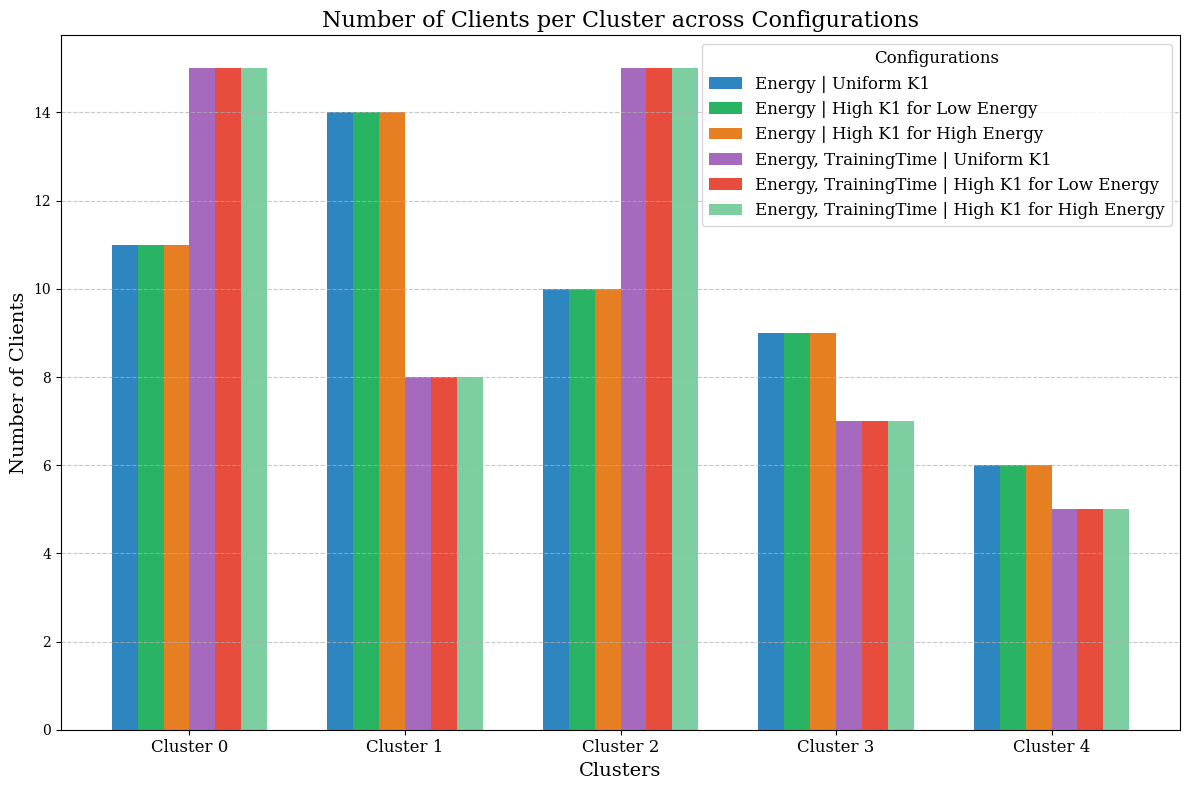

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Set font to Times New Roman (or a similar serif font if unavailable)
plt.rcParams["font.family"] = "DejaVu Serif"

# Plot configuration
plt.figure(figsize=(12, 8))
cluster_positions = np.arange(len(configurations["Energy | Uniform K1"]["clusters"]))
bar_width = 0.12

# Use muted, professional colors
colors = ['#2E86C1', '#28B463', '#E67E22', '#A569BD', '#E74C3C', '#7DCEA0']

# Create bars for each configuration
for idx, (config_name, config_data) in enumerate(configurations.items()):
    plt.bar(
        cluster_positions + idx * bar_width,
        config_data["number_of_clients"],
        width=bar_width,
        label=config_name,
        color=colors[idx % len(colors)]  # Cycle through colors if there are more configurations
    )

# Customize the plot
plt.xticks(
    cluster_positions + bar_width * (len(configurations) - 1) / 2,
    configurations["Energy | Uniform K1"]["clusters"],
    fontsize=12
)
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Number of Clients', fontsize=14)
plt.title('Number of Clients per Cluster across Configurations', fontsize=16)
plt.legend(fontsize=12, title="Configurations", title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("number_of_clients.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


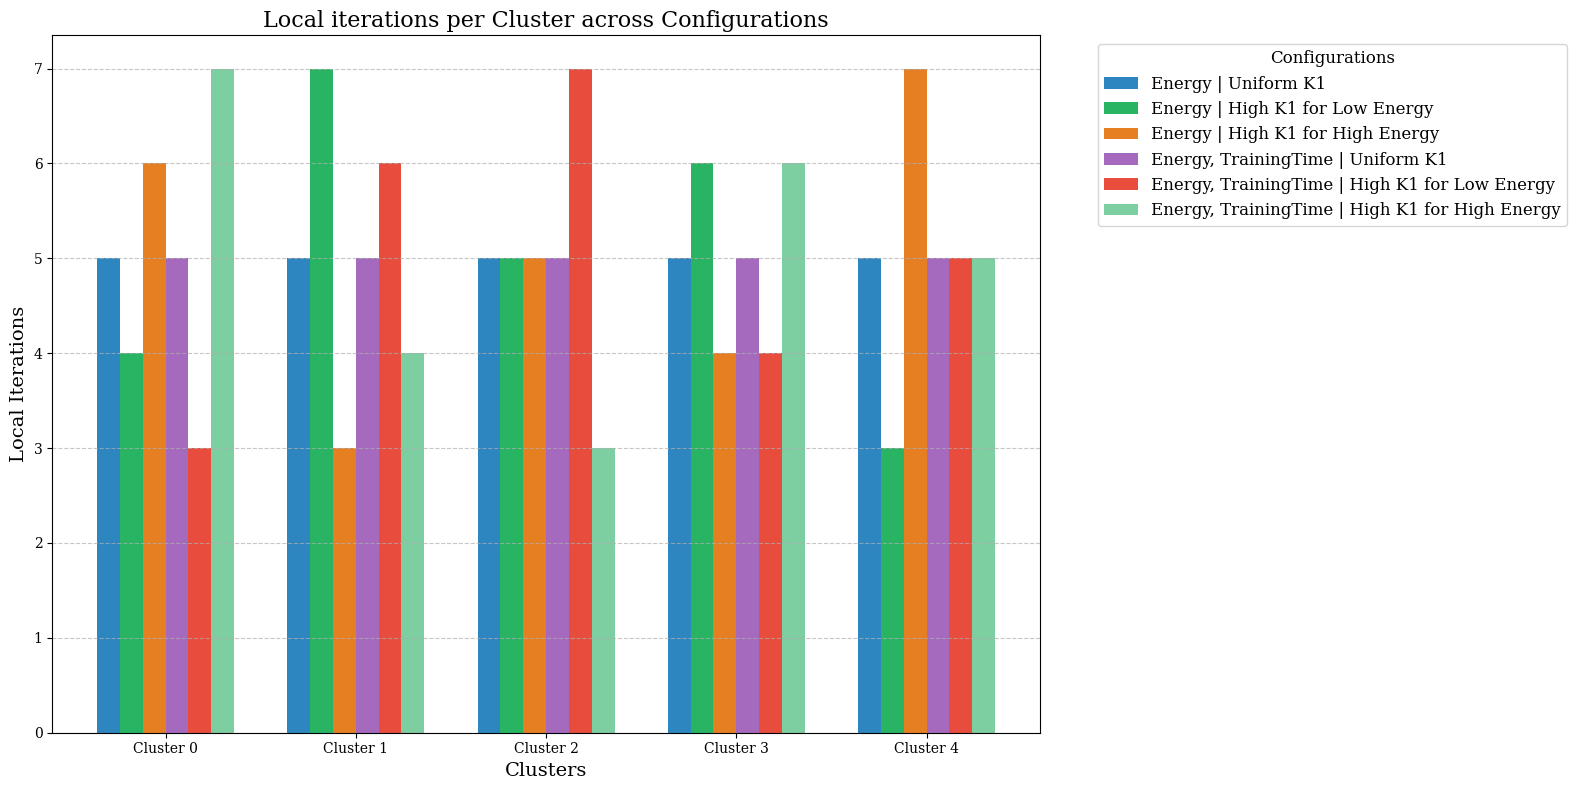

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Set font to Times New Roman (or a similar serif font if unavailable)
plt.rcParams["font.family"] = "DejaVu Serif"

# Plot configuration
plt.figure(figsize=(16, 8))
cluster_positions = np.arange(len(configurations["Energy | Uniform K1"]["clusters"]))
bar_width = 0.12

# Assign professional colors
colors = ['#2E86C1', '#28B463', '#E67E22', '#A569BD', '#E74C3C', '#7DCEA0']

# Create bars for each configuration
for idx, (config_name, config_data) in enumerate(configurations.items()):
    plt.bar(
        cluster_positions + idx * bar_width,
        config_data["local_iterations"],
        width=bar_width,
        label=config_name,
        color=colors[idx]
    )

# Customize the plot
plt.xticks(cluster_positions + bar_width * (len(configurations) - 1) / 2, configurations["Energy | Uniform K1"]["clusters"])
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Local Iterations', fontsize=14)
plt.title('Local iterations per Cluster across Configurations', fontsize=16)

# Position the legend outside the chart
plt.legend(
    fontsize=12, 
    title="Configurations", 
    title_fontsize=12, 
    loc='upper left', 
    bbox_to_anchor=(1.05, 1)
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("local_iterations.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


## Accuracy vs Energy Consumption for different configurations

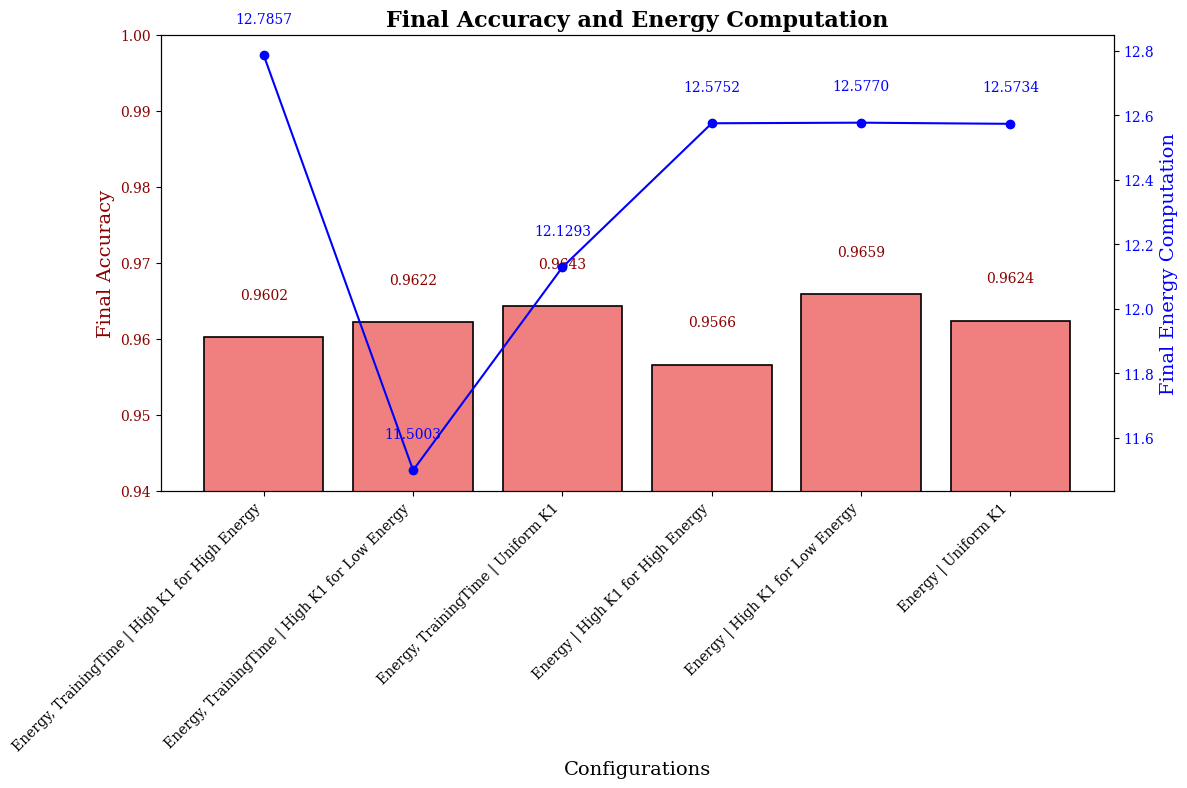

In [75]:
import re
import os
import matplotlib.pyplot as plt

# List of log file paths
log_files = [
    '../Experiments/Experiment_21/Energy_TrainingTime_High_K1_for_High_Energy',
    '../Experiments/Experiment_21/Energy_TrainingTime_High_K1_for_Low_Energy',
    '../Experiments/Experiment_21/Energy_TrainingTime_Uniform K1',
    '../Experiments/Experiment_21/Energy_High_K1_for_High_Energy',
    '../Experiments/Experiment_21/Energy_High_K1_for_Low_Energy',
    '../Experiments/Experiment_21/Energy_Uniform K1'
]

# Map file paths to display-friendly labels
file_labels = {
    '../Experiments/Experiment_21/Energy_TrainingTime_High_K1_for_High_Energy': 'Energy, TrainingTime | High K1 for High Energy',
    '../Experiments/Experiment_21/Energy_TrainingTime_High_K1_for_Low_Energy': 'Energy, TrainingTime | High K1 for Low Energy',
    '../Experiments/Experiment_21/Energy_TrainingTime_Uniform K1': 'Energy, TrainingTime | Uniform K1',
    '../Experiments/Experiment_21/Energy_High_K1_for_High_Energy': 'Energy | High K1 for High Energy',
    '../Experiments/Experiment_21/Energy_High_K1_for_Low_Energy': 'Energy | High K1 for Low Energy',
    '../Experiments/Experiment_21/Energy_Uniform K1': 'Energy | Uniform K1'
}

# Extract final accuracy and energy computation from each file
accuracies = {}
energy_computations = {}

for file_path in log_files:
    with open(file_path, 'r') as file:
        content = file.read()
        # Find the last occurrence of "Accuracy:" and extract the value
        accuracy_matches = re.findall(r"Accuracy: ([0-9]+\.[0-9]+)", content)
        if accuracy_matches:
            final_accuracy = float(accuracy_matches[-1])
            accuracies[file_labels[file_path]] = final_accuracy

        # Find the last occurrence of "Energy Computation:" and extract the value
        energy_matches = re.findall(r"Energy Computation: ([0-9]+\.[0-9]+)", content)
        if energy_matches:
            final_energy = float(energy_matches[-1])
            energy_computations[file_labels[file_path]] = final_energy

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot accuracy on the left y-axis
ax1.bar(accuracies.keys(), accuracies.values(), color='lightcoral', edgecolor='black', linewidth=1.2, label='Accuracy')
ax1.set_xlabel('Configurations', fontsize=14)
ax1.set_ylabel('Final Accuracy', fontsize=14, color='darkred')
ax1.tick_params(axis='y', labelcolor='darkred')
ax1.set_ylim(0.94, 1)
ax1.set_xticks(range(len(accuracies)))
ax1.set_xticklabels(accuracies.keys(), rotation=45, ha='right', fontsize=10)

# Add accuracy values on top of bars
for i, (key, value) in enumerate(accuracies.items()):
    ax1.text(i, value + 0.005, f"{value:.4f}", ha='center', fontsize=10, color='darkred')

# Plot energy computation on the right y-axis
ax2 = ax1.twinx()
ax2.plot(energy_computations.keys(), list(energy_computations.values()), color='blue', marker='o', label='Energy Computation')
ax2.set_ylabel('Final Energy Computation', fontsize=14, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add energy computation values on each point
for i, (key, value) in enumerate(energy_computations.items()):
    ax2.text(i, value + 0.1, f"{value:.4f}", ha='center', fontsize=10, color='blue')

# Title and layout
plt.title('Final Accuracy and Energy Computation', fontsize=16, fontweight='bold')
fig.tight_layout()

plt.savefig("accuracy_vs_energy.png", dpi=600, bbox_inches='tight')

plt.show()


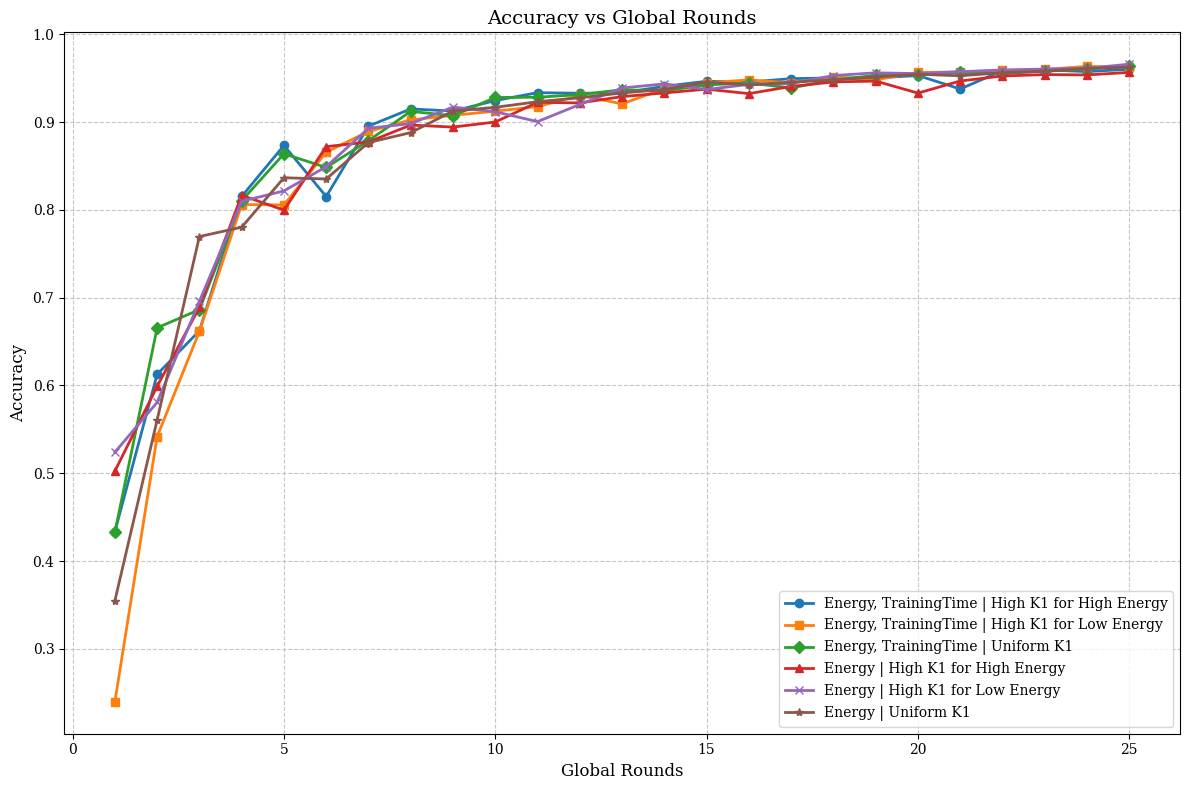

In [59]:
import re
import os
import matplotlib.pyplot as plt

# List of log file paths
log_files = [
    '../Experiments/Experiment_21/Energy_TrainingTime_High_K1_for_High_Energy',
    '../Experiments/Experiment_21/Energy_TrainingTime_High_K1_for_Low_Energy',
    '../Experiments/Experiment_21/Energy_TrainingTime_Uniform K1',
    '../Experiments/Experiment_21/Energy_High_K1_for_High_Energy',
    '../Experiments/Experiment_21/Energy_High_K1_for_Low_Energy',
    '../Experiments/Experiment_21/Energy_Uniform K1'
]

# Map file paths to display-friendly labels
file_labels = {
    '../Experiments/Experiment_21/Energy_TrainingTime_High_K1_for_High_Energy': 'Energy, TrainingTime | High K1 for High Energy',
    '../Experiments/Experiment_21/Energy_TrainingTime_High_K1_for_Low_Energy': 'Energy, TrainingTime | High K1 for Low Energy',
    '../Experiments/Experiment_21/Energy_TrainingTime_Uniform K1': 'Energy, TrainingTime | Uniform K1',
    '../Experiments/Experiment_21/Energy_High_K1_for_High_Energy': 'Energy | High K1 for High Energy',
    '../Experiments/Experiment_21/Energy_High_K1_for_Low_Energy': 'Energy | High K1 for Low Energy',
    '../Experiments/Experiment_21/Energy_Uniform K1': 'Energy | Uniform K1'
}

# Function to extract global round and accuracy from log files
def extract_accuracy(log_file):
    global_rounds = []
    accuracies = []

    if os.path.exists(log_file):
        with open(log_file, "r") as file:
            lines = file.readlines()
            for line in lines:
                match = re.search(r"GLOBAL TEST ROUND: (\d+).*?Accuracy: ([\d.]+)", line)
                if match:
                    global_round = int(match.group(1))
                    accuracy = float(match.group(2))
                    global_rounds.append(global_round)
                    accuracies.append(accuracy)
    else:
        print(f"File not found: {log_file}")

    return global_rounds, accuracies

# Plot accuracy with improvements
plt.figure(figsize=(12, 8))

markers = ['o', 's', 'D', '^', 'x', '*']  # Different marker styles
for idx, log_file in enumerate(log_files):
    global_rounds, accuracies = extract_accuracy(log_file)
    label = file_labels.get(log_file, log_file)
    if global_rounds and accuracies:
        plt.plot(
            global_rounds,
            accuracies,
            label=label,
            linewidth=2,
            marker=markers[idx % len(markers)],  # Cycle through markers
            markersize=6
        )

plt.title("Accuracy vs Global Rounds", fontsize=14)
plt.xlabel("Global Rounds", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("Accuracy_vs_GlobalRounds.png", dpi=600, bbox_inches='tight')
plt.show()


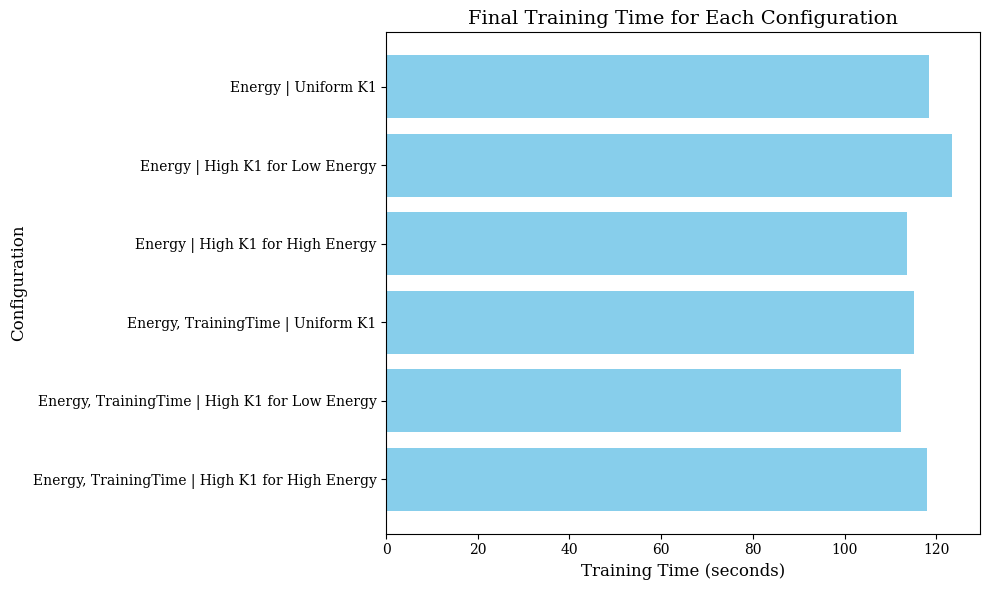

Final Training Times (seconds):
Energy, TrainingTime | High K1 for High Energy: 118.05
Energy, TrainingTime | High K1 for Low Energy: 112.31
Energy, TrainingTime | Uniform K1: 115.17
Energy | High K1 for High Energy: 113.70
Energy | High K1 for Low Energy: 123.39
Energy | Uniform K1: 118.44


In [67]:
import re
import os
import matplotlib.pyplot as plt

# Function to extract the final training time from the last relevant line in the log file
def extract_final_training_time(log_file):
    final_training_time = 0.0
    found_summary = False

    if os.path.exists(log_file):
        with open(log_file, "r") as file:
            lines = file.readlines()
            for i, line in enumerate(lines):
                if "SUMMARY EXPERIMENTS-" in line:
                    found_summary = True
                    # Start processing lines after "Summary Experiments"
                    for j in range(i + 1, len(lines)):
                        if "SUMMARY Device STATISTICS" in lines[j]:
                            break
                        # Continuously update the training time from matches until the last line
                        match = re.search(r"Training time: ([\d.]+)s", lines[j])
                        if match:
                            final_training_time = float(match.group(1))  # Overwrite with the latest match
    else:
        print(f"[ERROR] File not found: {log_file}")

    if not found_summary:
        print(f"[WARNING] 'Summary Experiments' not found in {log_file}")

    return final_training_time

# List of log files and labels
log_files = [
    '../Experiments/Experiment_21/Energy_TrainingTime_High_K1_for_High_Energy',
    '../Experiments/Experiment_21/Energy_TrainingTime_High_K1_for_Low_Energy',
    '../Experiments/Experiment_21/Energy_TrainingTime_Uniform K1',
    '../Experiments/Experiment_21/Energy_High_K1_for_High_Energy',
    '../Experiments/Experiment_21/Energy_High_K1_for_Low_Energy',
    '../Experiments/Experiment_21/Energy_Uniform K1'
]

file_labels = {
    '../Experiments/Experiment_21/Energy_TrainingTime_High_K1_for_High_Energy': 'Energy, TrainingTime | High K1 for High Energy',
    '../Experiments/Experiment_21/Energy_TrainingTime_High_K1_for_Low_Energy': 'Energy, TrainingTime | High K1 for Low Energy',
    '../Experiments/Experiment_21/Energy_TrainingTime_Uniform K1': 'Energy, TrainingTime | Uniform K1',
    '../Experiments/Experiment_21/Energy_High_K1_for_High_Energy': 'Energy | High K1 for High Energy',
    '../Experiments/Experiment_21/Energy_High_K1_for_Low_Energy': 'Energy | High K1 for Low Energy',
    '../Experiments/Experiment_21/Energy_Uniform K1': 'Energy | Uniform K1'
}

# Extract and store final training times
final_training_times = {}
for log_file in log_files:
    final_training_time = extract_final_training_time(log_file)
    label = file_labels.get(log_file, log_file)
    final_training_times[label] = final_training_time

# Check if training times were found
if all(time == 0.0 for time in final_training_times.values()):
    print("[ERROR] No training times found in any of the log files. Please check the log format.")

# Plot final training times
plt.figure(figsize=(10, 6))
labels = list(final_training_times.keys())
times = list(final_training_times.values())

plt.barh(labels, times, color='skyblue')
plt.title("Final Training Time for Each Configuration", fontsize=14)
plt.xlabel("Training Time (seconds)", fontsize=12)
plt.ylabel("Configuration", fontsize=12)
plt.tight_layout()
plt.show()

# Print final training times
print("Final Training Times (seconds):")
for label, total_time in final_training_times.items():
    print(f"{label}: {total_time:.2f}")


### K1 Range - (k1 values - 4, 7, 5, 6, 3 and uniform k1 - 5, 5, 5, 5, 5) 

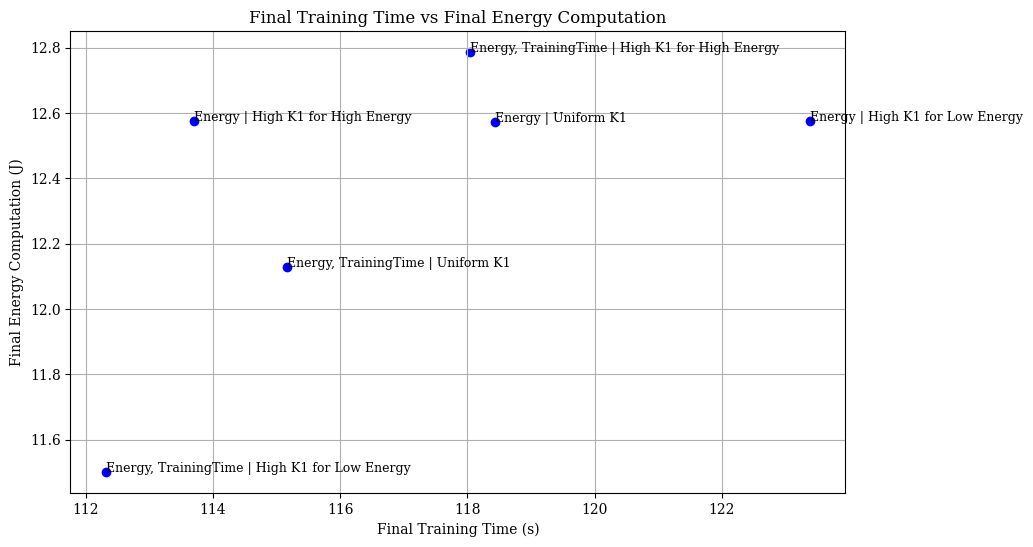

In [73]:
import matplotlib.pyplot as plt
import re

# Define file paths and labels
log_files = {
    "Energy, TrainingTime | High K1 for High Energy": "../Experiments/Experiment_21/Energy_TrainingTime_High_K1_for_High_Energy",
    "Energy, TrainingTime | High K1 for Low Energy": "../Experiments/Experiment_21/Energy_TrainingTime_High_K1_for_Low_Energy",
    "Energy, TrainingTime | Uniform K1": "../Experiments/Experiment_21/Energy_TrainingTime_Uniform K1",
    "Energy | High K1 for High Energy": "../Experiments/Experiment_21/Energy_High_K1_for_High_Energy",
    "Energy | High K1 for Low Energy": "../Experiments/Experiment_21/Energy_High_K1_for_Low_Energy",
    "Energy | Uniform K1": "../Experiments/Experiment_21/Energy_Uniform K1"
}

# Initialize dictionary to store final values
final_data = {}

# Regex pattern to extract training time and energy computation for each global round
pattern = re.compile(r"Training time:\s([\d\.]+)s\s+Energy Computation:\s([\d\.]+)")

# Extract the final round's values from each file
for label, file_path in log_files.items():
    with open(file_path, 'r') as file:
        lines = file.readlines()
        training_time = None
        energy_computation = None
        for line in lines:
            match = pattern.search(line)
            if match:
                training_time = float(match.group(1))
                energy_computation = float(match.group(2))
        # Store only the last round's values
        if training_time is not None and energy_computation is not None:
            final_data[label] = (training_time, energy_computation)

# Prepare data for plotting
labels = list(final_data.keys())
final_training_times = [final_data[label][0] for label in labels]
final_energy_consumptions = [final_data[label][1] for label in labels]

# Plot final training time vs final energy computation
plt.figure(figsize=(10, 6))
plt.scatter(final_training_times, final_energy_consumptions, color='b')

# Annotate each point with its label
for i, label in enumerate(labels):
    plt.annotate(label, (final_training_times[i], final_energy_consumptions[i]), fontsize=9)

plt.xlabel("Final Training Time (s)")
plt.ylabel("Final Energy Computation (J)")
plt.title("Final Training Time vs Final Energy Computation")
plt.grid(True)
plt.show()


### K1 Range increased - (k1 values - 3, 5, 10, 3, 3 and uniform k1 - 5, 5, 5, 5, 5)

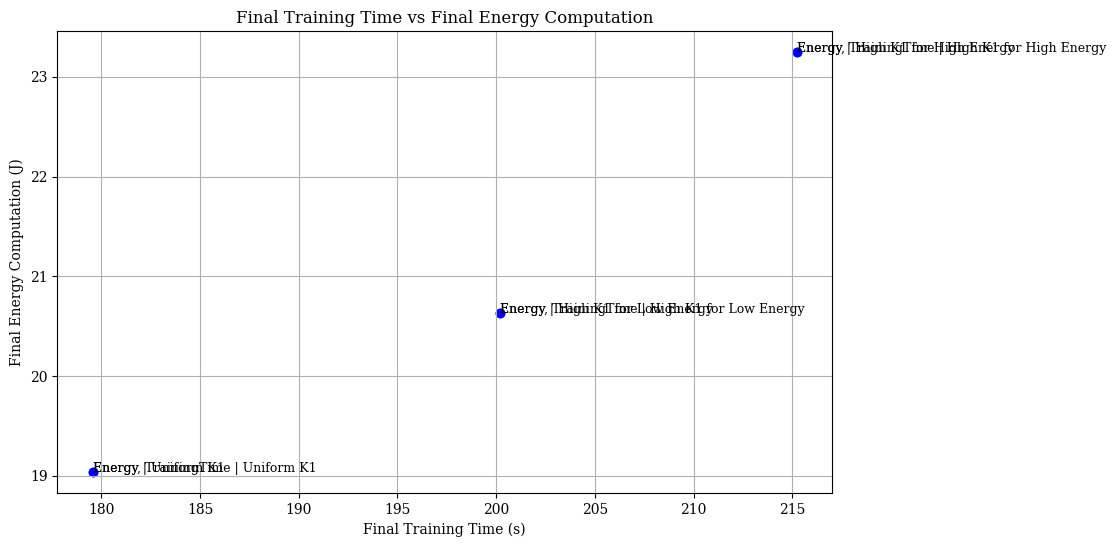

In [74]:
import matplotlib.pyplot as plt
import re

# Define file paths and labels
log_files = {
    "Energy, TrainingTime | High K1 for High Energy": "../Experiments/Experiment_24/Energy_TrainingTime_High_K1_for_High_Energy",
    "Energy, TrainingTime | High K1 for Low Energy": "../Experiments/Experiment_24/Energy_TrainingTime_High_K1_for_Low_Energy",
    "Energy, TrainingTime | Uniform K1": "../Experiments/Experiment_24/Energy_TrainingTime_Uniform K1",
    "Energy | High K1 for High Energy": "../Experiments/Experiment_24/Energy_High_K1_for_High_Energy",
    "Energy | High K1 for Low Energy": "../Experiments/Experiment_24/Energy_High_K1_for_Low_Energy",
    "Energy | Uniform K1": "../Experiments/Experiment_24/Energy_Uniform K1"
}

# Initialize dictionary to store final values
final_data = {}

# Regex pattern to extract training time and energy computation for each global round
pattern = re.compile(r"Training time:\s([\d\.]+)s\s+Energy Computation:\s([\d\.]+)")

# Extract the final round's values from each file
for label, file_path in log_files.items():
    with open(file_path, 'r') as file:
        lines = file.readlines()
        training_time = None
        energy_computation = None
        for line in lines:
            match = pattern.search(line)
            if match:
                training_time = float(match.group(1))
                energy_computation = float(match.group(2))
        # Store only the last round's values
        if training_time is not None and energy_computation is not None:
            final_data[label] = (training_time, energy_computation)

# Prepare data for plotting
labels = list(final_data.keys())
final_training_times = [final_data[label][0] for label in labels]
final_energy_consumptions = [final_data[label][1] for label in labels]

# Plot final training time vs final energy computation
plt.figure(figsize=(10, 6))
plt.scatter(final_training_times, final_energy_consumptions, color='b')

# Annotate each point with its label
for i, label in enumerate(labels):
    plt.annotate(label, (final_training_times[i], final_energy_consumptions[i]), fontsize=9)

plt.xlabel("Final Training Time (s)")
plt.ylabel("Final Energy Computation (J)")
plt.title("Final Training Time vs Final Energy Computation")
plt.grid(True)
plt.show()
